# Clustering animals with attributes

In this notebook, we'll get a feel for clustering by applying <font color="magenta">**k-means**</font> and <font color="magenta">**average linkage**</font> to cluster a collection of animals.

The data set we'll work with is called `Animals with Attributes`. It contains information about 50 animals. For each, it has 85 real-valued features that capture various properties of the animal: where it lives, what it eats, and so on. You can download the data set from:

http://attributes.kyb.tuebingen.mpg.de

(Under "Downloads", choose the "base package".) Make sure the files `'classes.txt'` and `'predicate-matrix-continuous.txt'` are in the same directory as this notebook before you begin.

In [1]:
## load the dataset

%matplotlib inline
import matplotlib
import matplotlib.pyplot
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

Load in the data set. The file `'classes.txt'` contains the names of the 50 animals. The file `'predicate-matrix-continuous.txt'` contains the data itself: 85 attributes per animal.

In [2]:
#
# Load in animal names
#
f = open('classes.txt')
lines = f.readlines()
names = []
for line in lines:
    (key,val) = line.split()
    names.append(val)
f.close()
#
# Load attribute matrix
#
x = np.loadtxt('predicate-matrix-continuous.txt')
print(x.shape)
len(names)

(50, 85)


50

In [3]:
print(names)

['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian', 'persian+cat', 'horse', 'german+shepherd', 'blue+whale', 'siamese+cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard', 'moose', 'spider+monkey', 'humpback+whale', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant+panda', 'deer', 'bobcat', 'pig', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus', 'raccoon', 'cow', 'dolphin']


##  K-means clustering


We now run Lloyd's algorithm to obtain a flat clustering of the data. In the code below, we ask for k=15 clusters, but you should experiment with other choices.

We ask for random initialization, which means that different runs of the algorithm will potentially have different outcomes. It is worth running the algorithm several times to see how the results change.

In [4]:
#
# Run Lloyd's algorithm
#
k = 15
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)

kmeans.labels_

array([ 5, 12,  1,  0, 10, 11,  9, 10,  1, 10, 14, 14,  8,  4,  8,  6,  7,
        1,  4,  7,  6, 12,  2,  0,  7, 14,  7,  4, 14,  3,  9, 12, 10, 13,
       13,  0,  5,  9, 11,  9, 12,  2,  8, 14, 11, 10,  1, 13,  2,  0])

In [5]:
#
# Get a list of the animals in each cluster
#
clusters =[]
for i in range(k):
    clusters.append([])

for i in range(0,50):
    clusters[kmeans.labels_[i]].append(names[i])

#
# Print out clusters
#
for j in range(0,k):
    print (j+1, clusters[j])

1 ['beaver', 'seal', 'otter', 'dolphin']
2 ['killer+whale', 'blue+whale', 'humpback+whale', 'walrus']
3 ['sheep', 'pig', 'cow']
4 ['bat']
5 ['hippopotamus', 'elephant', 'rhinoceros']
6 ['antelope', 'buffalo']
7 ['moose', 'ox']
8 ['spider+monkey', 'gorilla', 'chimpanzee', 'squirrel']
9 ['tiger', 'leopard', 'lion']
10 ['horse', 'giraffe', 'zebra', 'deer']
11 ['dalmatian', 'german+shepherd', 'siamese+cat', 'chihuahua', 'collie']
12 ['persian+cat', 'giant+panda', 'polar+bear']
13 ['grizzly+bear', 'fox', 'wolf', 'bobcat']
14 ['rat', 'weasel', 'raccoon']
15 ['skunk', 'mole', 'hamster', 'rabbit', 'mouse']


In [6]:
## Atributes
print(x)

[[-1.   -1.   -1.   ...  2.35  9.7   8.38]
 [39.25  1.39  0.   ... 58.64 20.14 11.39]
 [83.4  64.79  0.   ... 15.77 13.41 15.42]
 ...
 [63.57 43.1   0.   ... 35.95 28.26  5.  ]
 [55.31 55.46  0.   ...  5.04 18.89 72.99]
 [10.22 21.53 27.73 ...  3.96 14.05 37.98]]


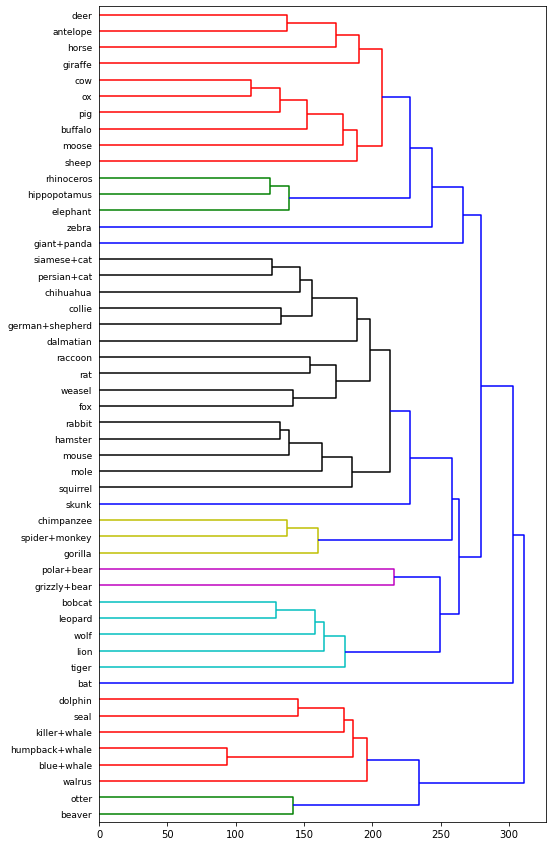

In [7]:
#
# Adjust figure size to accommodate the full tree
#
from pylab import rcParams
rcParams['figure.figsize'] = 8, 15
#
# Do hierarchical clustering using Ward's method
#
z = sch.linkage(x, method='average')

#
# Display dendrogram
#
info = sch.dendrogram(z, orientation='right', labels=names, leaf_font_size=9,p=10)